DATASET 1

Importing Necessary Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# For clustering evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Function to Randomly Initialize Centroids

In [ ]:
# Function to randomly initialize centroids
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

Function to Assign Points to Nearest Centroid

In [ ]:
# Function to assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

Function to Update Centroids

In [ ]:
# Function to update centroids based on current assignments
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
    return centroids

Feature Scaling (Standardization)

In [ ]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Algorithm Function

In [ ]:
# K-Means clustering algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < tol:
            break

    return centroids, labels

Calculate Inertia (Total Within-Cluster Sum of Squares) : Inertia is a measure of how well the data points are clustered

In [ ]:
# Function to calculate total within-cluster sum of squares (inertia)
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

Loading Dataset

In [ ]:
#loading dataset
X = np.loadtxt('/content/lab_vehicle.csv', delimiter=',', skiprows=1) # Skip the first row (header)

Applying K-Means with Different k Values

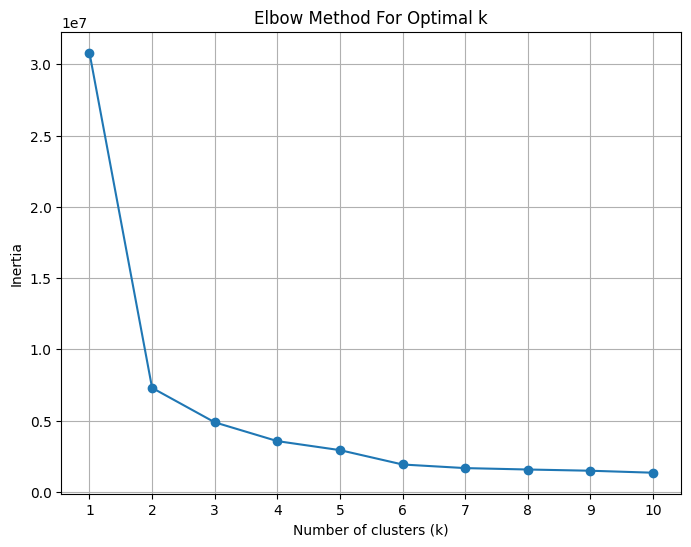

In [ ]:
# Try different values of k
inertias = []
k_values = range(1, 11)  # k from 1 to 10

for k in k_values:
    centroids, labels = kmeans(X, k)
    inertia = calculate_inertia(X, centroids, labels)
    inertias.append(inertia)

# Plot the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Plot the Elbow Curve

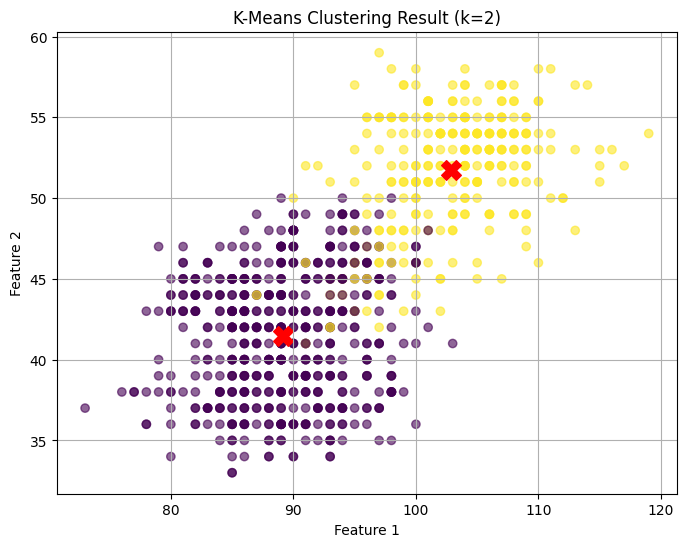

In [ ]:
# Choose k based on the elbow plot
optimal_k = 2

# Run K-Means
centroids, labels = kmeans(X, optimal_k)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering Result (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Silhouette Score Calculation

In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6735


Prediction Of K From Silhouette Score

Optimal k (Silhouette method): 2


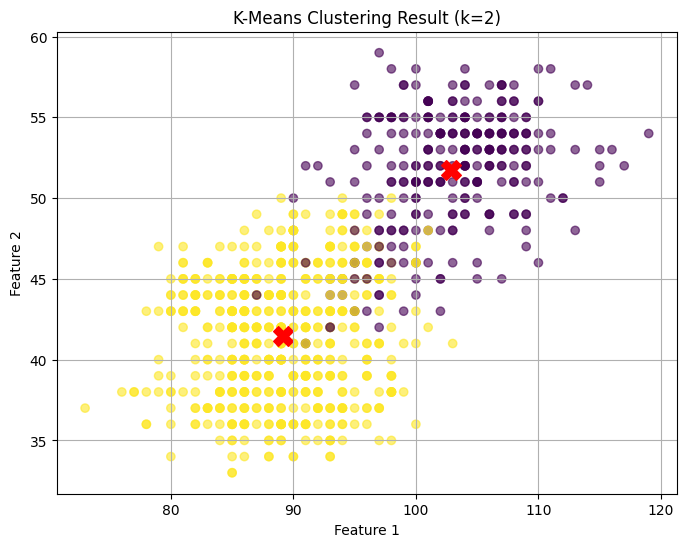

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # silhouette score not defined for k=1

for k in k_values:
    centroids, labels = kmeans(X, k)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Get the k with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k (Silhouette method): {optimal_k}")

# Run K-Means
centroids, labels = kmeans(X, optimal_k)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering Result (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Silhouette Plot

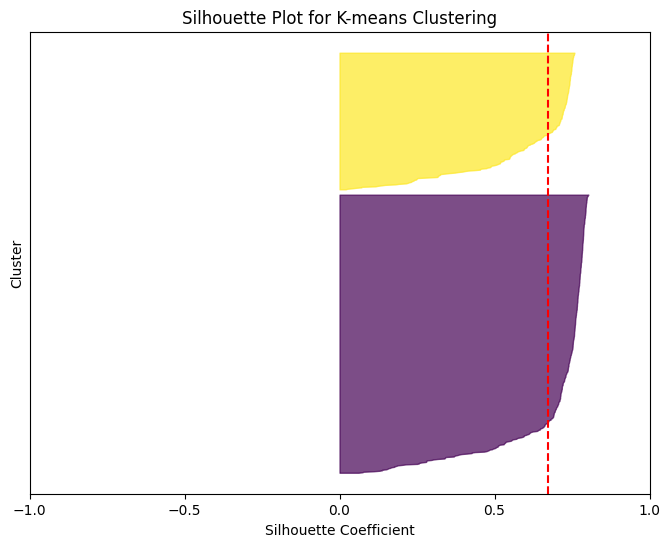

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(X, labels)

# Get unique clusters
n_clusters = len(np.unique(labels))

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create an array of colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

# Plot each cluster's silhouette scores
y_lower = 10
for i in range(n_clusters):
    # Get the silhouette values for this cluster
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    # Set the upper and lower bound for each cluster
    size_cluster = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster

    # Fill the silhouette plot for this cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    # Update the lower bound for the next cluster
    y_lower = y_upper + 10

# Add the overall silhouette score to the plot
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Labels and Title
ax.set_title("Silhouette Plot for K-means Clustering")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_yticks([])  # No need for y-ticks
ax.set_xticks(np.linspace(-1, 1, 5))  # Set x-ticks between -1 and 1
plt.show()

Davies-Bouldin Index Calculation

In [ ]:
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.4479


Calinski-Harabasz Index Calculation

In [ ]:
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Calinski-Harabasz Index: 2722.5059


DATASET 2

Importing Necessary Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# For clustering evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Function to Randomly Initialize Centroids

In [ ]:
# Function to randomly initialize centroids
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

Function to Assign Points to Nearest Centroid

In [ ]:
# Function to assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

Function to Update Centroids

In [ ]:
# Function to update centroids based on current assignments
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
    return centroids

Feature Scaling (Standardization)

In [ ]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data  # this is already a NumPy array with shape (150, 4)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Algorithm Function

In [ ]:
# K-Means clustering algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < tol:
            break

    return centroids, labels

Calculate Inertia (Total Within-Cluster Sum of Squares)

In [ ]:
# Function to calculate total within-cluster sum of squares (inertia)
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

Applying K-Means with Different k Values

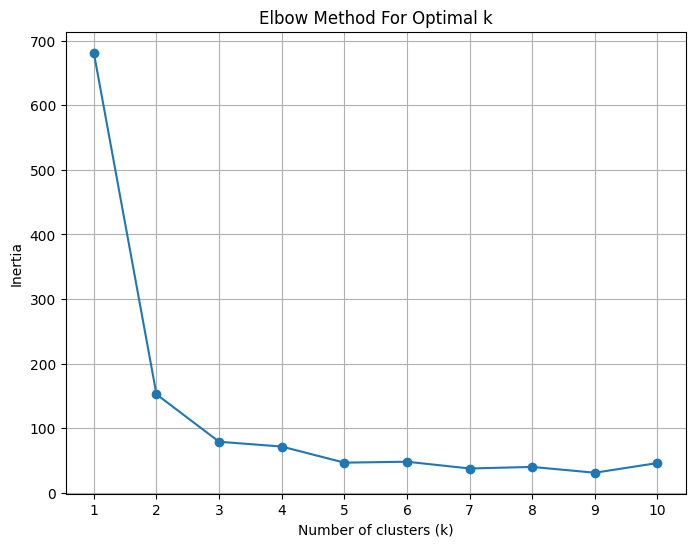

In [ ]:
# Try different values of k
inertias = []
k_values = range(1, 11)  # k from 1 to 10

for k in k_values:
    centroids, labels = kmeans(X, k)
    inertia = calculate_inertia(X, centroids, labels)
    inertias.append(inertia)

# Plot the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Plot the Elbow Curve

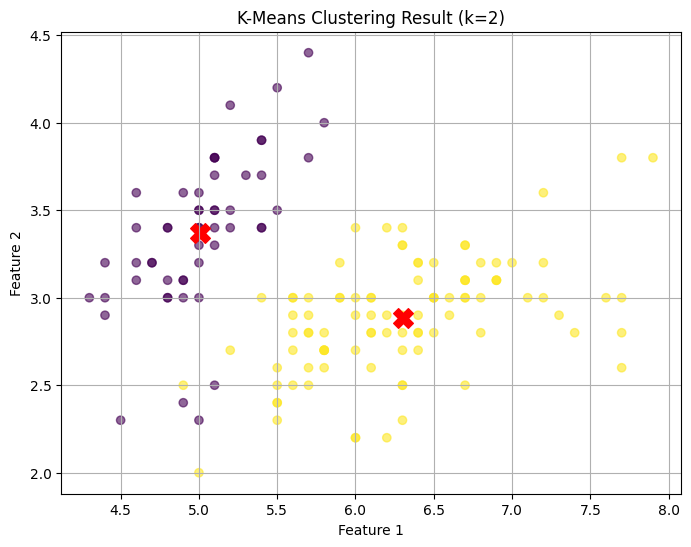

In [ ]:
# Choose k based on the elbow plot
optimal_k = 2

# Run K-Means
centroids, labels = kmeans(X, optimal_k)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering Result (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Silhouette Score Calculation

In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6810


Prediction Of K From Silhouette Score

Optimal k (Silhouette method): 2


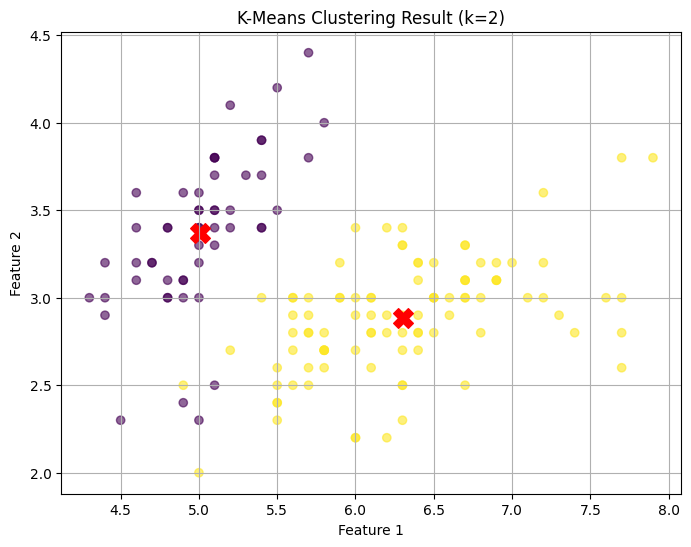

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # silhouette score not defined for k=1

for k in k_values:
    centroids, labels = kmeans(X, k)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Get the k with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k (Silhouette method): {optimal_k}")

# Run K-Means
centroids, labels = kmeans(X, optimal_k)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering Result (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Silhouette Plot

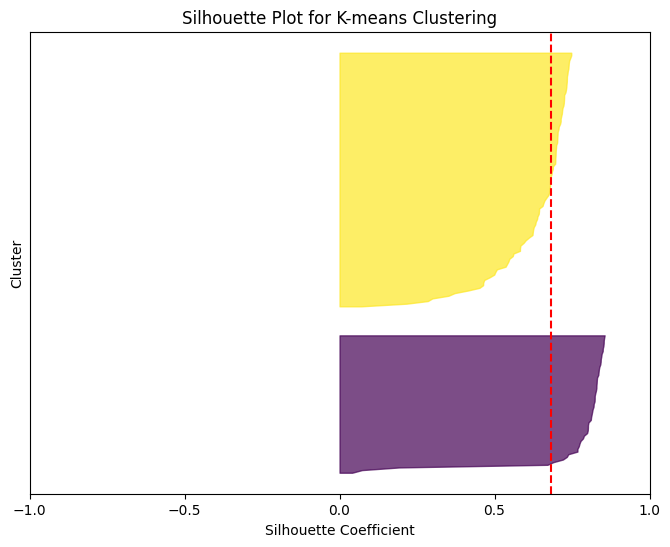

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(X, labels)

# Get unique clusters
n_clusters = len(np.unique(labels))

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create an array of colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

# Plot each cluster's silhouette scores
y_lower = 10
for i in range(n_clusters):
    # Get the silhouette values for this cluster
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    # Set the upper and lower bound for each cluster
    size_cluster = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster

    # Fill the silhouette plot for this cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    # Update the lower bound for the next cluster
    y_lower = y_upper + 10

# Add the overall silhouette score to the plot
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Labels and Title
ax.set_title("Silhouette Plot for K-means Clustering")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_yticks([])  # No need for y-ticks
ax.set_xticks(np.linspace(-1, 1, 5))  # Set x-ticks between -1 and 1
plt.show()

Davies-Bouldin Index Calculation

In [ ]:
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.4043


Calinski-Harabasz Index Calculation

In [ ]:
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Calinski-Harabasz Index: 513.9245
